# Introduction

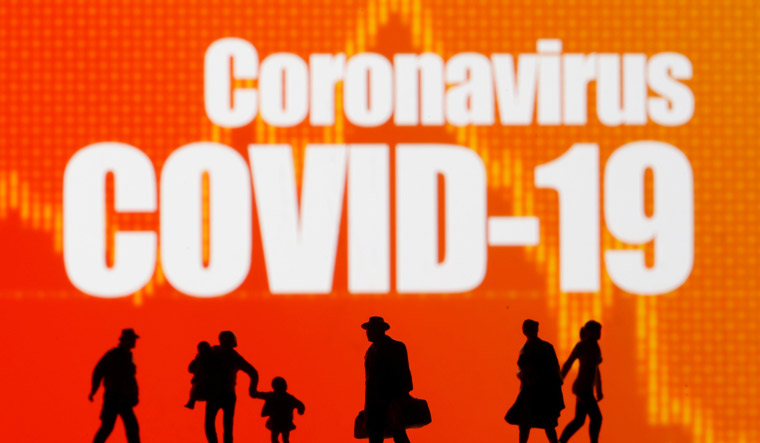

  **Coronaviruses** are important human and animal pathogens. At the end of 2019, a novel coronavirus was identified as the cause of a cluster of pneumonia cases in Wuhan, a city in the Hubei Province of China. It rapidly spread, resulting in an epidemic throughout China, followed by an increasing number of cases in other countries throughout the world. In February 2020, the World Health Organization designated the disease COVID-19, which stands for coronavirus disease 2019. The virus that causes COVID-19 is designated severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2); previously, it was referred to as 2019-nCoV.

There’s currently no vaccine to prevent coronavirus disease (COVID-19).



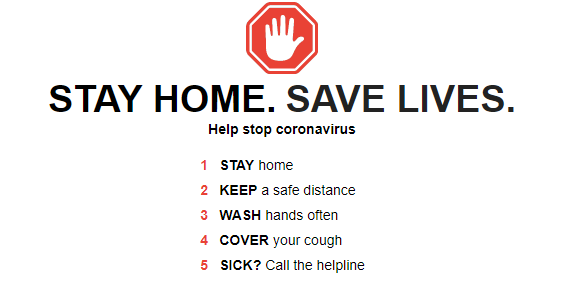


### Import all the required libraries

In [1]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

In [2]:
# Read the input files
# Load Data
train_df = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-3/train.csv')
test_df = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-3/test.csv')
submission_df = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-3/submission.csv')

In [3]:
profile = ProfileReport(train_df, title='Pandas Profiling Report - for Training Dataset', html={'style':{'full_width':True}})

In [4]:

profile

### Pandas Profiling shows that Province_State has Null values and needs to be treated

In [5]:
train_df['Date'] = pd.to_datetime(train_df['Date'], infer_datetime_format=True)
test_df['Date'] = pd.to_datetime(test_df['Date'], infer_datetime_format=True)

train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23562 entries, 0 to 23561
Data columns (total 6 columns):
Id                23562 non-null int64
Province_State    10010 non-null object
Country_Region    23562 non-null object
Date              23562 non-null datetime64[ns]
ConfirmedCases    23562 non-null float64
Fatalities        23562 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13158 entries, 0 to 13157
Data columns (total 4 columns):
ForecastId        13158 non-null int64
Province_State    5590 non-null object
Country_Region    13158 non-null object
Date              13158 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 411.3+ KB


In [6]:

train_df.rename(columns={'Country_Region':'Country'}, inplace=True)
test_df.rename(columns={'Country_Region':'Country'}, inplace=True)

train_df.rename(columns={'Province_State':'State'}, inplace=True)
test_df.rename(columns={'Province_State':'State'}, inplace=True)

In [7]:
train_y1 = train_df.iloc[:, -2]
train_y1.head()
train_y2 = train_df.iloc[:, -1]
train_y2.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Fatalities, dtype: float64

In [8]:
def fillState(state, country):
    if state == 'None': return country
    return state

train_df_orig = train_df.copy()

train_df['State'].fillna('None', inplace=True)
train_df['State'] = train_df.loc[:, ['State', 'Country']].apply(lambda x : fillState(x['State'], x['Country']), axis=1)

train_df.loc[:, 'Date'] = train_df.Date.dt.strftime("%m%d")
train_df["Date"]  = train_df["Date"].astype(int)
train_df.head()


,Id,State,Country,Date,ConfirmedCases,Fatalities
0,1,Afghanistan,Afghanistan,122,0.0,0.0
1,2,Afghanistan,Afghanistan,123,0.0,0.0
2,3,Afghanistan,Afghanistan,124,0.0,0.0
3,4,Afghanistan,Afghanistan,125,0.0,0.0
4,5,Afghanistan,Afghanistan,126,0.0,0.0


In [9]:
test_df_orig = test_df.copy()

test_df['State'].fillna('None', inplace=True)
test_df['State'] = test_df.loc[:, ['State', 'Country']].apply(lambda x : fillState(x['State'], x['Country']), axis=1)

test_df.loc[:, 'Date'] = test_df.Date.dt.strftime("%m%d")
test_df["Date"]  = test_df["Date"].astype(int)

test_df.head()

,ForecastId,State,Country,Date
0,1,Afghanistan,Afghanistan,326
1,2,Afghanistan,Afghanistan,327
2,3,Afghanistan,Afghanistan,328
3,4,Afghanistan,Afghanistan,329
4,5,Afghanistan,Afghanistan,330


### Label Encoding of the dataset

In [10]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

train_df.Country = le.fit_transform(train_df.Country)
train_df['State'] = le.fit_transform(train_df['State'])

train_df.head()


,Id,State,Country,Date,ConfirmedCases,Fatalities
0,1,0,0,122,0.0,0.0
1,2,0,0,123,0.0,0.0
2,3,0,0,124,0.0,0.0
3,4,0,0,125,0.0,0.0
4,5,0,0,126,0.0,0.0


In [11]:
test_df.Country = le.fit_transform(test_df.Country)
test_df['State'] = le.fit_transform(test_df['State'])

test_df.head()


,ForecastId,State,Country,Date
0,1,0,0,326
1,2,0,0,327
2,3,0,0,328
3,4,0,0,329
4,5,0,0,330


In [12]:
train_df_orig.head()

,Id,State,Country,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [13]:
train_df_orig.loc[train_df_orig.Country == 'Afghanistan', :]

,Id,State,Country,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0
...,...,...,...,...,...,...
72,73,NaN,Afghanistan,2020-04-03,281.0,6.0
73,74,NaN,Afghanistan,2020-04-04,299.0,7.0
74,75,NaN,Afghanistan,2020-04-05,349.0,7.0
75,76,NaN,Afghanistan,2020-04-06,367.0,11.0


In [14]:
test_df.tail()

,ForecastId,State,Country,Date
13153,13154,304,179,503
13154,13155,304,179,504
13155,13156,304,179,505
13156,13157,304,179,506
13157,13158,304,179,507


In [15]:
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn import preprocessing

le = preprocessing.LabelEncoder()

from xgboost import XGBRegressor

countries = train_df.Country.unique()


In [16]:
# Predict data and Create submission file from test data
xout = pd.DataFrame({'ForecastId': [], 'ConfirmedCases': [], 'Fatalities': []})

for country in countries:
    states = train_df.loc[train_df.Country == country, :].State.unique()
    #print(country, states)
    # check whether string is nan or not
    for state in states:
        train_df_CS = train_df.loc[(train_df.Country == country) & (train_df.State == state), ['State', 'Country', 'Date', 'ConfirmedCases', 'Fatalities']]
        
        train_df_CS_y1 = train_df_CS.loc[:, 'ConfirmedCases']
        train_df_CS_y2 = train_df_CS.loc[:, 'Fatalities']
        
        train_df_CS = train_df_CS.loc[:, ['State', 'Country', 'Date']]
        
        train_df_CS.Country = le.fit_transform(train_df_CS.Country)
        train_df_CS['State'] = le.fit_transform(train_df_CS['State'])
        
        test_df_CS = test_df.loc[(test_df.Country == country) & (test_df.State == state), ['State', 'Country', 'Date', 'ForecastId']]
        
        test_df_CS_Id = test_df_CS.loc[:, 'ForecastId']
        test_df_CS = test_df_CS.loc[:, ['State', 'Country', 'Date']]
        
        test_df_CS.Country = le.fit_transform(test_df_CS.Country)
        test_df_CS['State'] = le.fit_transform(test_df_CS['State'])
        
        #models_C[country] = gridSearchCV(model, X_Train_CS, y1_Train_CS, param_grid, 10, 'neg_mean_squared_error')
        #models_F[country] = gridSearchCV(model, X_Train_CS, y2_Train_CS, param_grid, 10, 'neg_mean_squared_error')
        
        xmodel1 = XGBRegressor(n_estimators=1000)
        xmodel1.fit(train_df_CS, train_df_CS_y1)
        y1_xpred = np.round(xmodel1.predict(test_df_CS))
        
        xmodel2 = XGBRegressor(n_estimators=1000)
        xmodel2.fit(train_df_CS, train_df_CS_y2)
        y2_xpred = np.round(xmodel2.predict(test_df_CS))
        
        xdata = pd.DataFrame({'ForecastId': test_df_CS_Id, 'ConfirmedCases': y1_xpred, 'Fatalities': y2_xpred})
        xout = pd.concat([xout, xdata], axis=0)


In [17]:
xout.ForecastId = xout.ForecastId.astype('int')
xout.tail()
xout.to_csv('submission.csv', index=False)